In [1]:
import tensorflow as tf
import scipy
import matplotlib.pyplot as plt
import os
from keras.layers import Conv2D,Rescaling,RandomFlip,RandomRotation,Dense,Flatten,MaxPooling2D,InputLayer,Dropout,RandomZoom,RandomBrightness,RandomTranslation
from keras.losses import SparseCategoricalCrossentropy
from keras import Sequential
from keras.optimizers import Adam,SGD,RMSprop
from pathlib import Path
import numpy as np
import copy
from random import randint

tf.config.list_physical_devices()

2024-09-10 23:13:47.642457: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 23:13:47.657075: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-10 23:13:47.657141: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-10 23:13:47.667331: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-10 23:13:48.820883: W tensorflow/compiler/tf

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
rescale = Rescaling(scale=1.0/255,name='rescale')
rotate = RandomRotation(factor=0.4,name="rotate")
flip = RandomFlip(mode="horizontal_and_vertical",name="flip")
zoom = RandomZoom(height_factor=(-0.2, -0.2), name="zoom")
translate = RandomTranslation(height_factor=0.2,width_factor=0.2,name='translate',fill_mode='nearest')


2024-09-10 23:13:52.068499: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-10 23:13:52.068649: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-10 23:13:52.068692: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-10 23:13:52.174419: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-10 23:13:52.174524: I external/local_xla/xla/stream_executor

In [3]:
no_of_class = 102
IMG_SIZE = (224,224)

train = tf.keras.utils.image_dataset_from_directory('../102_flowers_dataset/train/',image_size=IMG_SIZE)
test = tf.keras.utils.image_dataset_from_directory('../102_flowers_dataset/valid/',image_size=IMG_SIZE)

#train = train.map(lambda x,y: (rescale(x),y))
#test = test.map(lambda x,y: (rescale(x),y))


Found 6552 files belonging to 102 classes.
Found 818 files belonging to 102 classes.


2024-09-10 23:13:53.571219: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


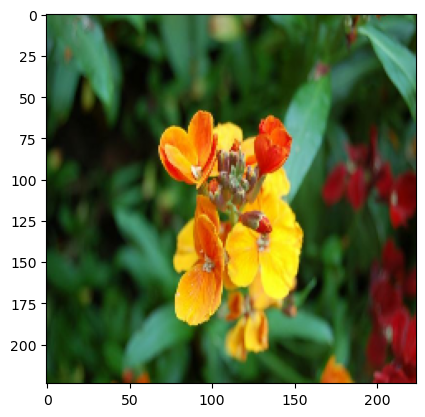

In [4]:
for i,j in train.take(1):
    plt.imshow(rescale(i[0]).numpy())


In [29]:
model_test = Sequential(name='CNN_Model')        

model_test.add(InputLayer(shape=(IMG_SIZE[0],IMG_SIZE[1],3),name='input'))
model_test.add(rescale)
model_test.add(rotate)
model_test.add(zoom)
model_test.add(flip)

model_test.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu',padding='same',name='convo_1'))
model_test.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu',padding='same',name='convo_2'))
model_test.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu',padding='same',name='convo_3'))
model_test.add(MaxPooling2D(pool_size=(2, 2),strides=2,name='pool_1'))
#model_test.add(Dropout(0.2))

model_test.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu',padding='same',name='convo_4'))
model_test.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu',padding='same',name='convo_5'))
model_test.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu',padding='same',name='convo_6'))
model_test.add(MaxPooling2D(pool_size=(2, 2),strides=2,name='pool_2'))
#model_test.add(Dropout(0.2))

model_test.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu',padding='same',name='convo_7'))
model_test.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu',padding='same',name='convo_8'))
model_test.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu',padding='same',name='convo_9'))
model_test.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu',padding='same',name='convo_10'))
model_test.add(MaxPooling2D(pool_size=(2, 2),strides=2,name='pool_3'))
#model_test.add(Dropout(0.2))

model_test.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu',padding='same',name='convo_11'))
model_test.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu',padding='same',name='convo_12'))
model_test.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu',padding='same',name='convo_13'))
model_test.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu',padding='same',name='convo_14'))
model_test.add(MaxPooling2D(pool_size=(2, 2),strides=2,name='pool_4'))
#model_test.add(Dropout(0.2))

model_test.add(Flatten())
model_test.add(Dense(256, name='dense_1',activation='relu'))
model_test.add(Dense(256, name='dense_2',activation='relu'))
model_test.add(Dense(256, name='dense_3',activation='relu'))
model_test.add(Dense(102, name='final',activation="softmax"))


In [30]:
model_test.compile(optimizer=Adam(learning_rate=0.00001),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [31]:
model_test.summary()

Model: "CNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescale (Rescaling)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rotate (RandomRotation)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ zoom (RandomZoom)               │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flip (RandomFlip)               │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_1 (Conv2D)                │ (None, 224, 224, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_2 (Conv2D)                │ (None, 224, 224, 16)   │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_3 (Conv2D)                │ (None, 224, 224, 16)   │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_1 (MaxPooling2D)           │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_4 (Conv2D)                │ (None, 112, 112, 32)   │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_5 (Conv2D)                │ (None, 112, 112, 32)   │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_6 (Conv2D)                │ (None, 112, 112, 32)   │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_2 (MaxPooling2D)           │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_7 (Conv2D)                │ (None, 56, 56, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_8 (Conv2D)                │ (None, 56, 56, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_9 (Conv2D)                │ (None, 56, 56, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_10 (Conv2D)               │ (None, 56, 56, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_3 (MaxPooling2D)           │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_11 (Conv2D)               │ (None, 28, 28, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_12 (Conv2D)               │ (None, 28, 28, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_13 (Conv2D)               │ (None, 28, 28, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convo_14 (Conv2D)               │ (None, 28, 28, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool_4 (MaxPooling2D)           │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,79

 Total params: 8,451,494 (32.24 MB)

 Trainable params: 8,451,494 (32.24 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
#tf.keras.utils.plot_model(model_test,rankdir="LR")

In [9]:
"""new_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
    classes=no_of_class,
    classifier_activation="softmax",
)

new_model.summary()"""


'new_model = tf.keras.applications.VGG16(\n    include_top=False,\n    weights="imagenet",\n    input_tensor=None,\n    input_shape=(224,224,3),\n    pooling=None,\n    classes=no_of_class,\n    classifier_activation="softmax",\n)\n\nnew_model.summary()'

In [10]:
#model_test.load_weights('../saved_weights/cnn.keras')

In [36]:
history=model_test.fit(train,epochs=10,validation_data=test,validation_batch_size=8,batch_size=8)

Epoch 1/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 46s 224ms/step - accuracy: 0.2080 - loss: 3.1929 - val_accuracy: 0.1614 - val_loss: 3.4744
Epoch 2/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 47s 230ms/step - accuracy: 0.2148 - loss: 3.1480 - val_accuracy: 0.1858 - val_loss: 3.3958
Epoch 3/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 47s 231ms/step - accuracy: 0.2225 - loss: 3.0950 - val_accuracy: 0.1797 - val_loss: 3.3706
Epoch 4/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 47s 230ms/step - accuracy: 0.2417 - loss: 3.0315 - val_accuracy: 0.1822 - val_loss: 3.3486
Epoch 5/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 47s 231ms/step - accuracy: 0.2438 - loss: 3.0071 - val_accuracy: 0.2200 - val_loss: 3.2925
Epoch 6/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 47s 230ms/step - accuracy: 0.2471 - loss: 2.9668 - val_accuracy: 0.2090 - val_loss: 3.2951
Epoch 7/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 47s 231ms/step - accuracy: 0.2642 - loss: 2.9093 - val_accuracy: 0.1895 - val_loss: 3.2635
Epoch 8/10
205/205 ━━━━━━━━━━━━━━━━━━━━ 47s 231ms/step - accuracy: 0.2702 - loss: 2

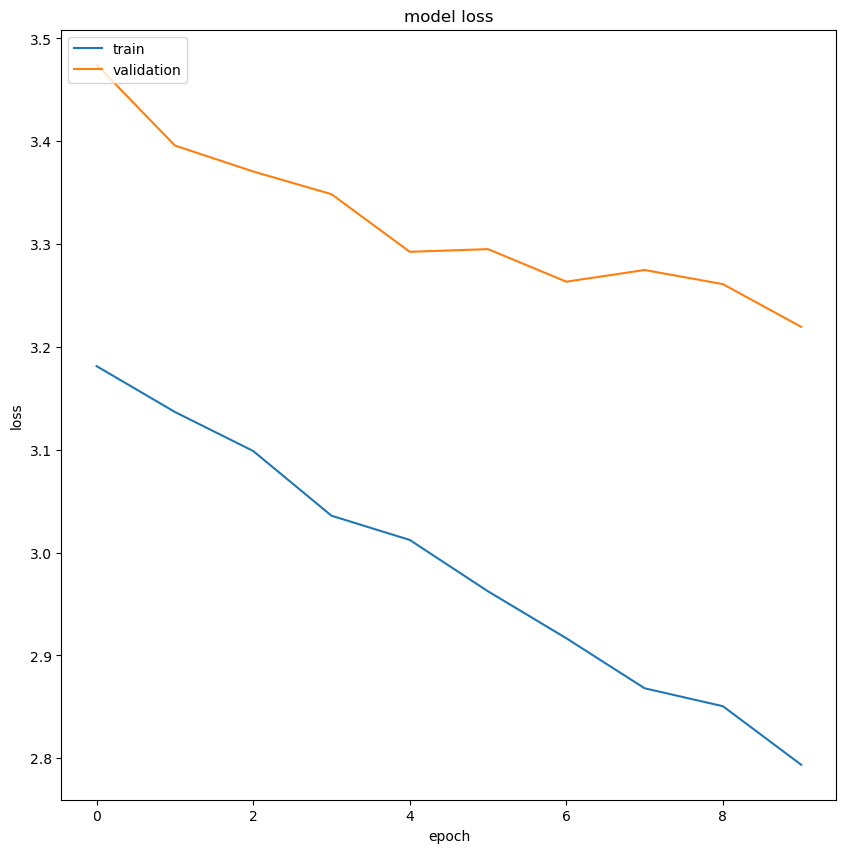

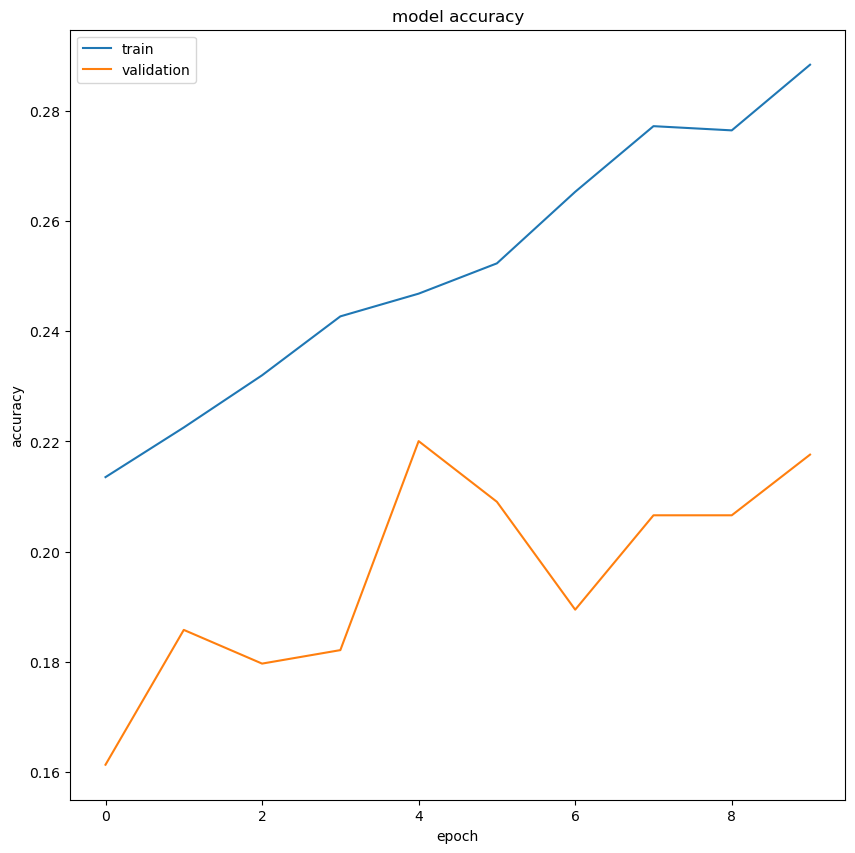

In [37]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [42]:
model_test.save('../saved_weights/cnn.keras')

In [ ]:
model_test.evaluate(test)